In [198]:
import pandas as pd
import matplotlib.pyplot as plt

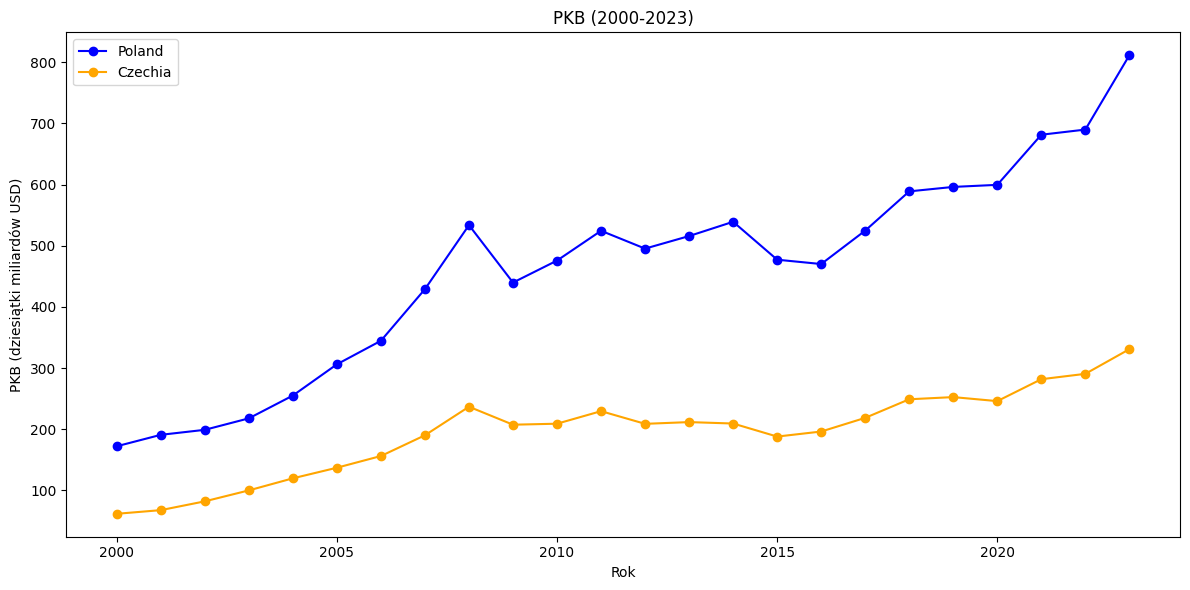

In [ ]:
def transform_gdp_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    df = df.drop(columns=['Series Name', 'Series Code'])
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='GDP')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    df_melted = df_melted.dropna()
    return df_melted

file_path = 'gdp.csv'
gdp_data = transform_gdp_data(file_path)

df_poland = gdp_data[gdp_data['Country Name'] == 'Poland']
df_czechia = gdp_data[gdp_data['Country Name'] == 'Czechia']

df_poland.loc[:, 'GDP'] = df_poland['GDP'].astype(float) / 10**9
df_czechia.loc[:, 'GDP'] = df_czechia['GDP'].astype(float) / 10**9

plt.figure(figsize=(12,6))

plt.plot(df_poland['Year'], df_poland['GDP'], marker='o', label='Poland', color='blue')

plt.plot(df_czechia['Year'], df_czechia['GDP'], marker='o', label='Czechia', color='orange')

plt.xlabel('Rok')
plt.ylabel('PKB (dziesiątki miliardów USD)')
plt.title('PKB (2000-2023)')
plt.legend()
plt.tight_layout()
plt.show()

gdp_data.to_csv('gdp_transformed.csv', index=False)


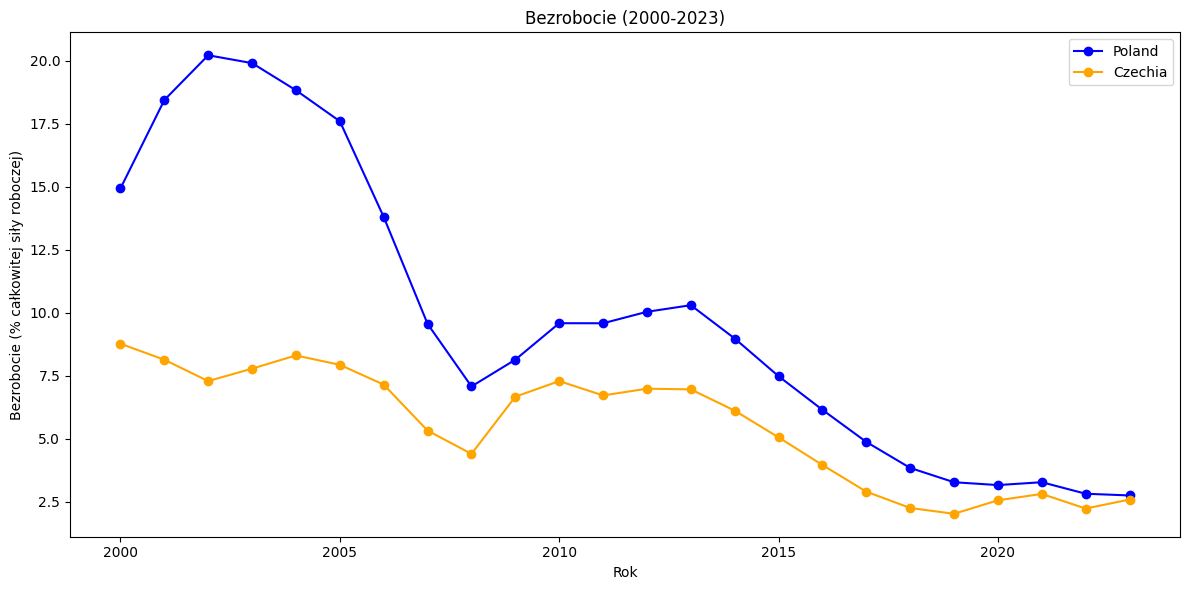

In [ ]:
def transform_unemployment_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    df = df.drop(columns=['Series Name', 'Series Code'])
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Unemployment')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    df_melted = df_melted.dropna()
    return df_melted

file_path = 'unemployment.csv'
unemployment_data = transform_unemployment_data(file_path)

df_poland = unemployment_data[unemployment_data['Country Name'] == 'Poland']
df_czechia = unemployment_data[unemployment_data['Country Name'] == 'Czechia']

df_poland.loc[:, 'Unemployment'] = df_poland['Unemployment'].astype(float)
df_czechia.loc[:, 'Unemployment'] = df_czechia['Unemployment'].astype(float)

plt.figure(figsize=(12,6))

plt.plot(df_poland['Year'], df_poland['Unemployment'], marker='o', label='Poland', color='blue')

plt.plot(df_czechia['Year'], df_czechia['Unemployment'], marker='o', label='Czechia', color='orange')

plt.xlabel('Rok')
plt.ylabel('Bezrobocie (% całkowitej siły roboczej)')
plt.title('Bezrobocie (2000-2023)')
plt.legend()
plt.tight_layout()
plt.show()

unemployment_data.to_csv('unemployment_transformed.csv', index=False)


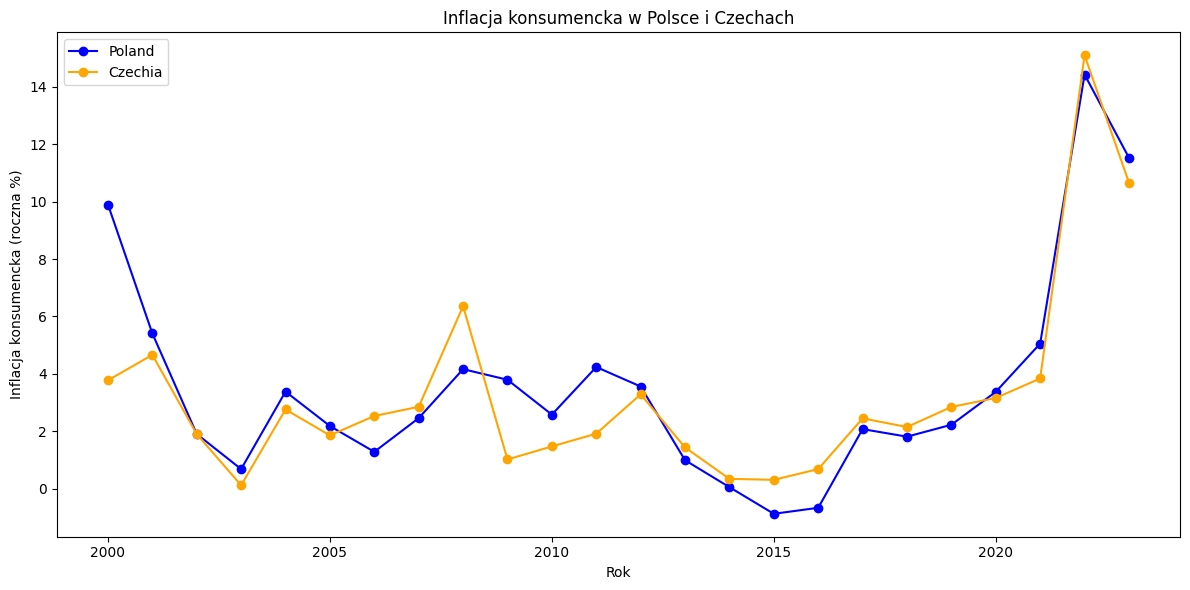

In [ ]:
def transform_inflation_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    
    df = df.drop(columns=['Series Name', 'Series Code'])
    
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Inflation')
    
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    
    df_melted = df_melted.sort_values(['Country Name', 'Year'])
    
    return df_melted

file_path = 'inflation.csv'
result = transform_inflation_data(file_path)

plt.figure(figsize=(12,6))

# Wykres dla Polski
country_data = result[result['Country Name'] == 'Poland']
plt.plot(country_data['Year'], country_data['Inflation'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
country_data = result[result['Country Name'] == 'Czechia']
plt.plot(country_data['Year'], country_data['Inflation'], marker='o', label='Czechia', color='orange')

plt.title('Inflacja konsumencka w Polsce i Czechach')
plt.xlabel('Rok')
plt.ylabel('Inflacja konsumencka (roczna %)')
plt.legend()
plt.tight_layout()
plt.show()

result.to_csv('inflation_data_transformed.csv', index=False)


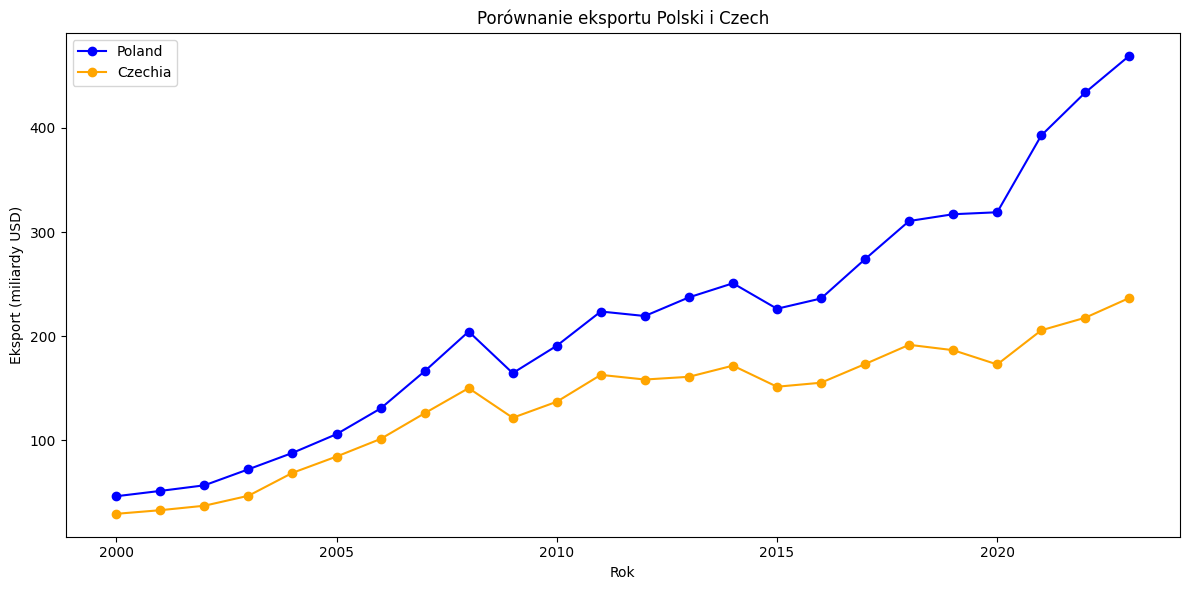

In [ ]:
def transform_export_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    
    df = df.drop(columns=['Series Name', 'Series Code'])
    
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Exports')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    
    df_melted['Exports'] = df_melted['Exports'] / 1_000_000_000
    
    df_melted = df_melted.sort_values(['Country Name', 'Year'])
    
    return df_melted

file_path = 'export.csv'
result = transform_export_data(file_path)

plt.figure(figsize=(12,6))

# Wykres dla Polski
country_data = result[result['Country Name'] == 'Poland']
plt.plot(country_data['Year'], country_data['Exports'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
country_data = result[result['Country Name'] == 'Czechia']
plt.plot(country_data['Year'], country_data['Exports'], marker='o', label='Czechia', color='orange')

plt.title('Porównanie eksportu Polski i Czech')
plt.xlabel('Rok')
plt.ylabel('Eksport (miliardy USD)')
plt.legend()
plt.tight_layout()
plt.show()

result.to_csv('export_data_transformed.csv', index=False)



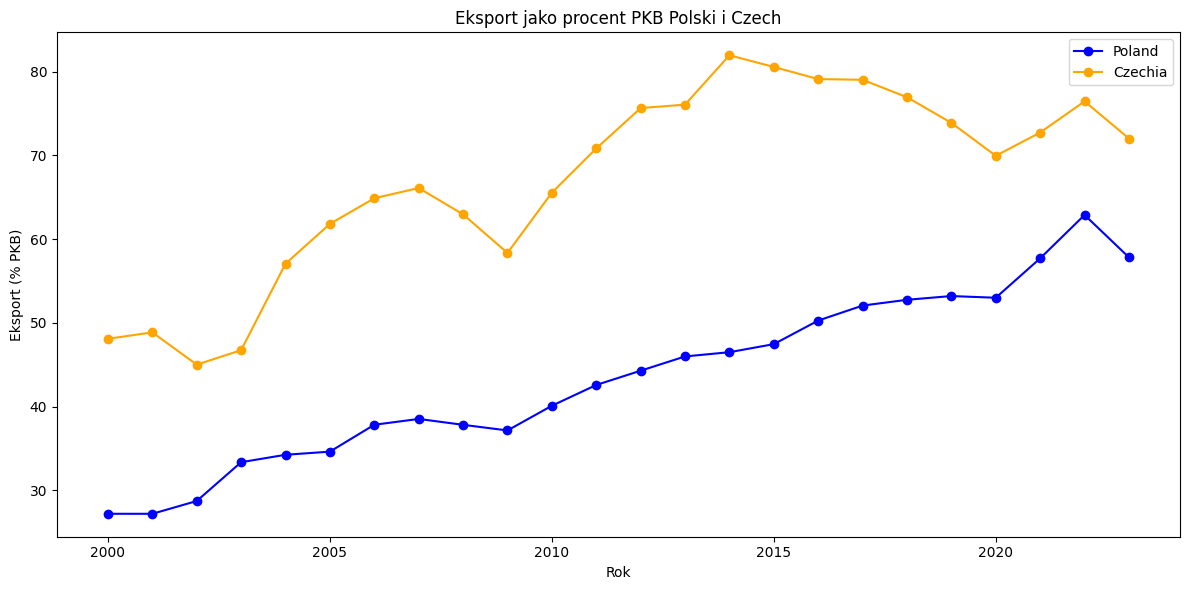

In [ ]:
def transform_export_percent_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    
    df = df.drop(columns=['Series Name', 'Series Code'])
    
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Export Percentage')
    
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    
    df_melted = df_melted.sort_values(['Country Name', 'Year'])
    
    return df_melted

file_path = 'export_percent_of_gdp.csv'
result = transform_export_percent_data(file_path)

plt.figure(figsize=(12,6))

# Wykres dla Polski
country_data = result[result['Country Name'] == 'Poland']
plt.plot(country_data['Year'], country_data['Export Percentage'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
country_data = result[result['Country Name'] == 'Czechia']
plt.plot(country_data['Year'], country_data['Export Percentage'], marker='o', label='Czechia', color='orange')

plt.title('Eksport jako procent PKB Polski i Czech')
plt.xlabel('Rok')
plt.ylabel('Eksport (% PKB)')
plt.legend()
plt.tight_layout()
plt.show()

result.to_csv('export_percentage_data_transformed.csv', index=False)


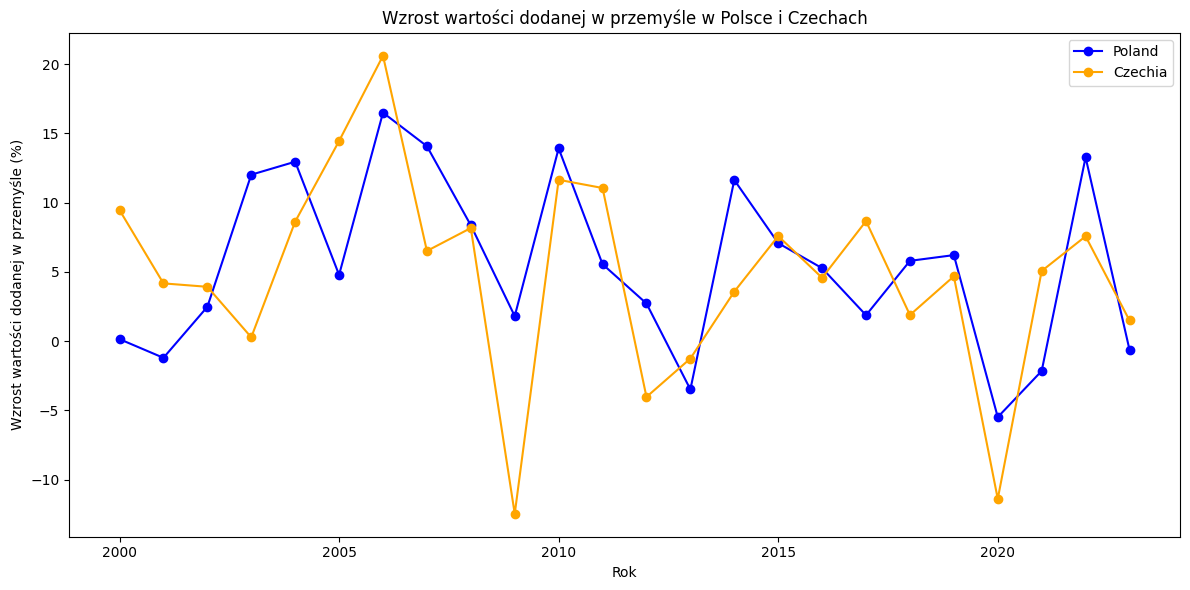

In [ ]:
def transform_manufacture_growth_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    
    df = df.drop(columns=['Series Name', 'Series Code'])
    
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Manufacture Growth')
    
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    
    df_melted = df_melted.sort_values(['Country Name', 'Year'])
    
    return df_melted

file_path = 'manufacture_growth.csv'
result = transform_manufacture_growth_data(file_path)

plt.figure(figsize=(12,6))

# Wykres dla Polski
country_data = result[result['Country Name'] == 'Poland']
plt.plot(country_data['Year'], country_data['Manufacture Growth'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
country_data = result[result['Country Name'] == 'Czechia']
plt.plot(country_data['Year'], country_data['Manufacture Growth'], marker='o', label='Czechia', color='orange')

plt.title('Wzrost wartości dodanej w przemyśle w Polsce i Czechach')
plt.xlabel('Rok')
plt.ylabel('Wzrost wartości dodanej w przemyśle (%)')
plt.legend()
plt.tight_layout()
plt.show()

result.to_csv('manufacture_growth_data_transformed.csv', index=False)



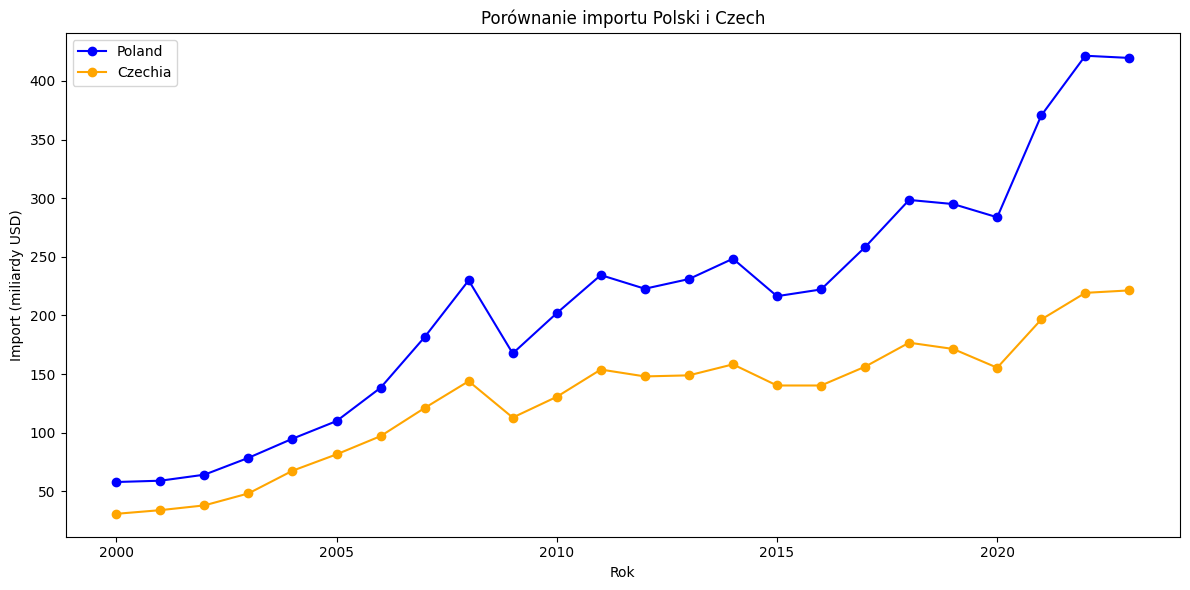

In [ ]:
def transform_import_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    
    df = df.drop(columns=['Series Name', 'Series Code'])
    
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Imports')
    
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    
    df_melted['Imports'] = df_melted['Imports'] / 1_000_000_000
    
    df_melted = df_melted.sort_values(['Country Name', 'Year'])
    
    return df_melted

file_path = 'import.csv'
result = transform_import_data(file_path)

plt.figure(figsize=(12,6))

# Wykres dla Polski
country_data = result[result['Country Name'] == 'Poland']
plt.plot(country_data['Year'], country_data['Imports'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
country_data = result[result['Country Name'] == 'Czechia']
plt.plot(country_data['Year'], country_data['Imports'], marker='o', label='Czechia', color='orange')

plt.title('Porównanie importu Polski i Czech')
plt.xlabel('Rok')
plt.ylabel('Import (miliardy USD)')
plt.legend()
plt.tight_layout()
plt.show()

result.to_csv('import_data_transformed.csv', index=False)


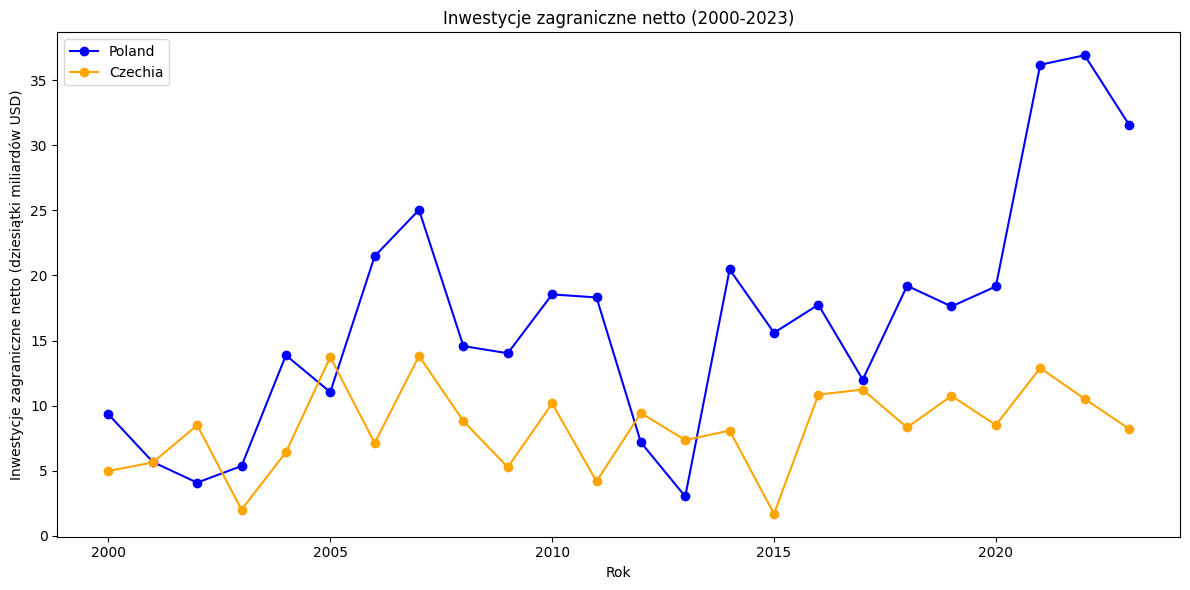

In [ ]:
def transform_foreign_investment_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    df = df.drop(columns=['Series Name', 'Series Code'])
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Investment')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    df_melted = df_melted.dropna()
    return df_melted

file_path = 'foreign_investment.csv'
foreign_investment_data = transform_foreign_investment_data(file_path)

df_poland = foreign_investment_data[foreign_investment_data['Country Name'] == 'Poland']
df_czechia = foreign_investment_data[foreign_investment_data['Country Name'] == 'Czechia']

df_poland.loc[:, 'Investment'] = df_poland['Investment'].astype(float) / 10**9
df_czechia.loc[:, 'Investment'] = df_czechia['Investment'].astype(float) / 10**9

plt.figure(figsize=(12,6))

# Wykres dla Polski
plt.plot(df_poland['Year'], df_poland['Investment'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
plt.plot(df_czechia['Year'], df_czechia['Investment'], marker='o', label='Czechia', color='orange')

plt.xlabel('Rok')
plt.ylabel('Inwestycje zagraniczne netto (dziesiątki miliardów USD)')
plt.title('Inwestycje zagraniczne netto (2000-2023)')
plt.legend()
plt.tight_layout()
plt.show()

foreign_investment_data.to_csv('foreign_investment_transformed.csv', index=False)


C:\Users\damian\AppData\Local\Temp\ipykernel_2408\891270641.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population['Working Age Population'] = total_population.apply(
C:\Users\damian\AppData\Local\Temp\ipykernel_2408\891270641.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population['Non-Working Age Population'] = total_population['Value'] - total_population['Working Age Population']


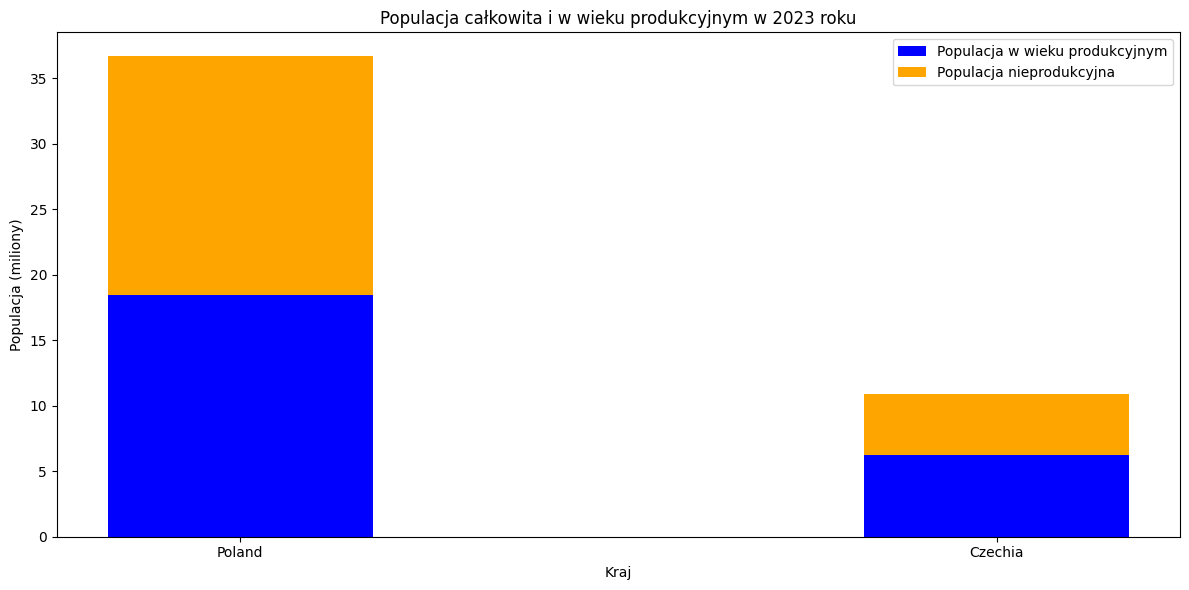

In [ ]:
def transform_population_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    df = df.drop(columns=['Series Name', 'Series Code'])
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Value')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    df_melted = df_melted.replace('..', pd.NA).dropna()
    df_2023 = df_melted[df_melted['Year'] == 2023]
    df_2023 = df_2023.dropna()
    return df_2023

file_path = 'population.csv'
population_data = transform_population_data(file_path)

total_population = population_data[(population_data['Country Name'].isin(['Poland', 'Czechia'])) & (population_data['Value'] > 1000000)]
dependency_ratio = population_data[(population_data['Country Name'].isin(['Poland', 'Czechia'])) & (population_data['Value'] < 100)]

total_population.loc[:, 'Value'] = total_population['Value'] / 1_000_000

total_population['Working Age Population'] = total_population.apply(
    lambda row: row['Value'] * (dependency_ratio.loc[dependency_ratio['Country Name'] == row['Country Name'], 'Value'].values[0] / 100), axis=1
)

total_population['Non-Working Age Population'] = total_population['Value'] - total_population['Working Age Population']

plt.figure(figsize=(12,6))
bar_width = 0.35
index = range(len(total_population))

plt.bar(index, total_population['Working Age Population'], bar_width, label='Populacja w wieku produkcyjnym', color='blue')

plt.bar(index, total_population['Non-Working Age Population'], bar_width, bottom=total_population['Working Age Population'], label='Populacja nieprodukcyjna', color='orange')

plt.xlabel('Kraj')
plt.ylabel('Populacja (miliony)')
plt.title('Populacja całkowita i w wieku produkcyjnym w 2023 roku')
plt.xticks(index, total_population['Country Name'])
plt.legend()
plt.tight_layout()
plt.show()

total_population.to_csv('population_data_transformed.csv', index=False)


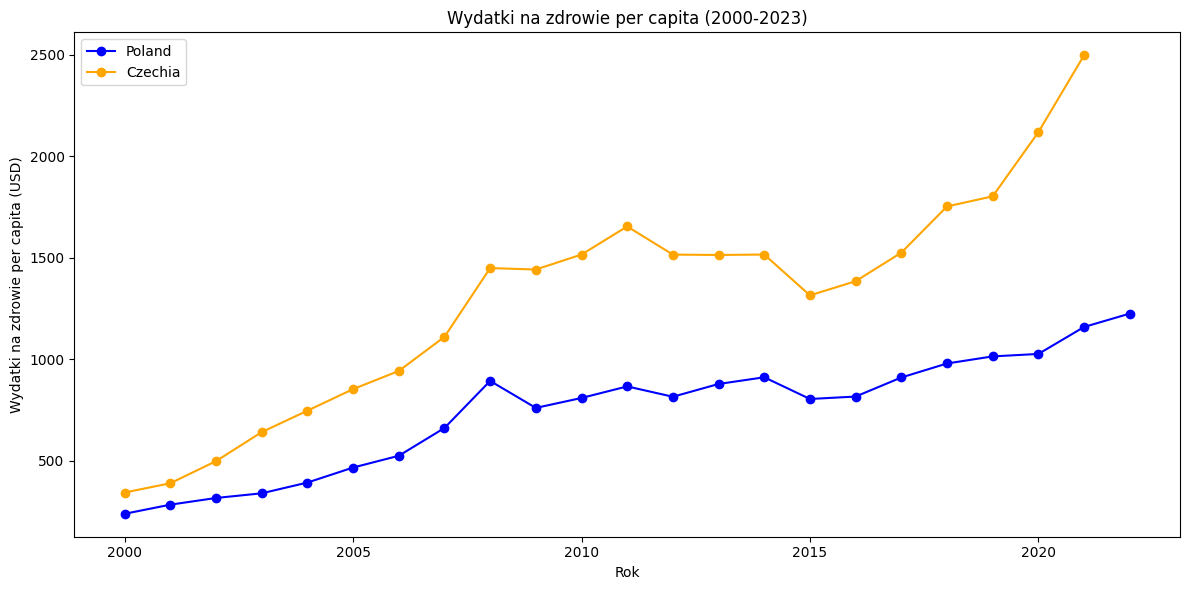

In [ ]:
def transform_health_expenditure_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    df = df.drop(columns=['Series Name', 'Series Code'])
    df_melted = df.melt(id_vars=['Country Name', 'Country Code'], 
                         var_name='Year', 
                         value_name='Health Expenditure')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
    df_melted = df_melted.replace('..', pd.NA).dropna()
    return df_melted

file_path = 'hc_per_capita.csv'
health_expenditure_data = transform_health_expenditure_data(file_path)

df_poland = health_expenditure_data[health_expenditure_data['Country Name'] == 'Poland']
df_czechia = health_expenditure_data[health_expenditure_data['Country Name'] == 'Czechia']

df_poland.loc[:, 'Health Expenditure'] = df_poland['Health Expenditure'].astype(float)
df_czechia.loc[:, 'Health Expenditure'] = df_czechia['Health Expenditure'].astype(float)

plt.figure(figsize=(12,6))

# Wykres dla Polski
plt.plot(df_poland['Year'], df_poland['Health Expenditure'], marker='o', label='Poland', color='blue')

# Wykres dla Czech
plt.plot(df_czechia['Year'], df_czechia['Health Expenditure'], marker='o', label='Czechia', color='orange')

plt.xlabel('Rok')
plt.ylabel('Wydatki na zdrowie per capita (USD)')
plt.title('Wydatki na zdrowie per capita (2000-2023)')
plt.legend()
plt.tight_layout()
plt.show()

health_expenditure_data.to_csv('hc_per_capita_transformed.csv', index=False)



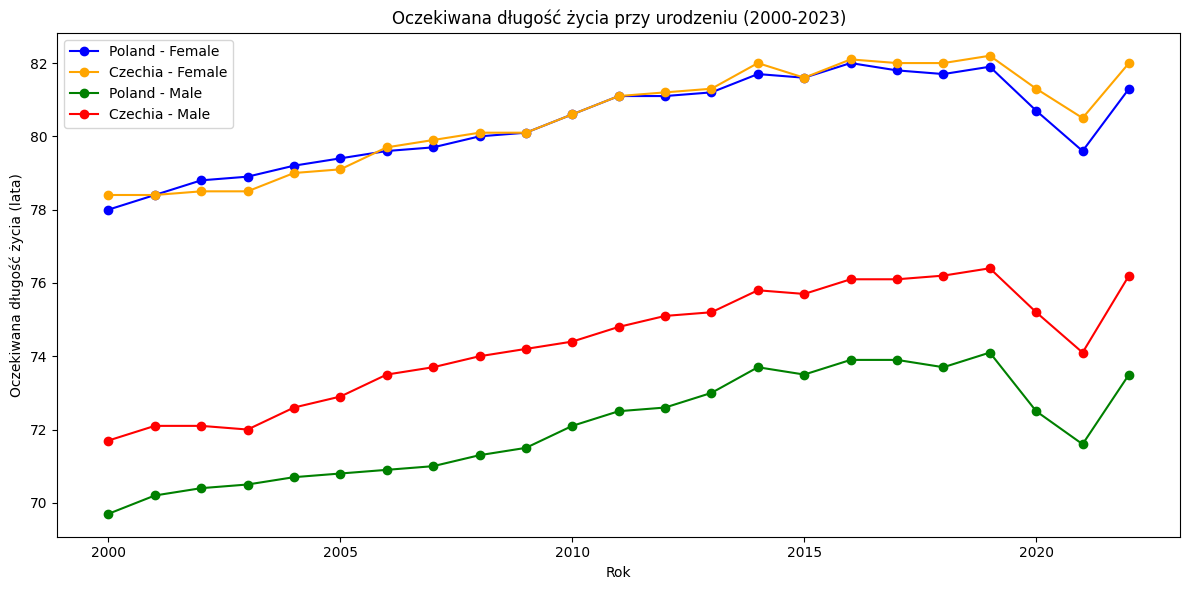

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

def transform_life_expectancy_data(file_path):
    df = pd.read_csv(file_path, skipfooter=4, engine='python', encoding='ISO-8859-1')
    df_melted = df.melt(id_vars=['Country Name', 'Country Code', 'Series Name'], 
                         var_name='Year', 
                         value_name='Life Expectancy')
    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)')
    df_melted = df_melted.dropna(subset=['Year'])
    df_melted['Year'] = df_melted['Year'].astype(int)
    df_melted = df_melted[(df_melted['Year'] >= 2000) & (df_melted['Year'] <= 2023)]
    df_melted = df_melted.replace('..', pd.NA).dropna()
    return df_melted

file_path = 'life_expectancy.csv'
life_expectancy_data = transform_life_expectancy_data(file_path)

df_poland_female = life_expectancy_data[(life_expectancy_data['Country Name'] == 'Poland') & (life_expectancy_data['Series Name'] == 'Life expectancy at birth, female (years)')]
df_czechia_female = life_expectancy_data[(life_expectancy_data['Country Name'] == 'Czechia') & (life_expectancy_data['Series Name'] == 'Life expectancy at birth, female (years)')]
df_poland_male = life_expectancy_data[(life_expectancy_data['Country Name'] == 'Poland') & (life_expectancy_data['Series Name'] == 'Life expectancy at birth, male (years)')]
df_czechia_male = life_expectancy_data[(life_expectancy_data['Country Name'] == 'Czechia') & (life_expectancy_data['Series Name'] == 'Life expectancy at birth, male (years)')]

df_poland_female.loc[:, 'Life Expectancy'] = df_poland_female['Life Expectancy'].astype(float)
df_czechia_female.loc[:, 'Life Expectancy'] = df_czechia_female['Life Expectancy'].astype(float)
df_poland_male.loc[:, 'Life Expectancy'] = df_poland_male['Life Expectancy'].astype(float)
df_czechia_male.loc[:, 'Life Expectancy'] = df_czechia_male['Life Expectancy'].astype(float)

plt.figure(figsize=(12,6))

# Wykres dla Polski_kobiety
plt.plot(df_poland_female['Year'], df_poland_female['Life Expectancy'], marker='o', label='Poland - Female', color='blue')

# Wykres dla Czech_kobiety
plt.plot(df_czechia_female['Year'], df_czechia_female['Life Expectancy'], marker='o', label='Czechia - Female', color='orange')

# Wykres dla Polski_mężczyźni
plt.plot(df_poland_male['Year'], df_poland_male['Life Expectancy'], marker='o', label='Poland - Male', color='green')

# Wykres dla Czech_mężczyźni
plt.plot(df_czechia_male['Year'], df_czechia_male['Life Expectancy'], marker='o', label='Czechia - Male', color='red')

plt.xlabel('Rok')
plt.ylabel('Oczekiwana długość życia (lata)')
plt.title('Oczekiwana długość życia przy urodzeniu (2000-2023)')
plt.legend()
plt.tight_layout()
plt.show()

life_expectancy_data.to_csv('life_expectancy_transformed.csv', index=False)


